# Defining Custom DataLoader and Visualizing Contents

## Description
Notebook to define a custom DataLoader for PyTorch. In this case it's for the following dataset

- `02_forest_fire_dataset` 

**Source:** https://www.kaggle.com/datasets/alik05/forest-fire-dataset

This notebook will also rely heavily on this [Pytorch Tutorial](https://pytorch.org/tutorials/beginner/introyt/introyt1_tutorial.html)

Additionally, we'll test a few helper functions to 
- Create a custom DataLoader
- Preview the DataLoader contents
- Calculate the statistical properties of the images (mean and standard deviation)

## Directory Structure

It's assumed the directory structure is as follows

``` bash
.
├── data/
│   └── 02_forest_fire_dataset/
│       ├── testing/
│       └── training/
└── jupyter_notebooks/
```

# Import Usual Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
# display images and plots in high resolution
%config InlineBackend.figure_format = 'retina'

## Import Custom Modules

In [3]:
import sys 
sys.path

['/Users/rodrigo/anaconda3/envs/pytorch_env/lib/python312.zip',
 '/Users/rodrigo/anaconda3/envs/pytorch_env/lib/python3.12',
 '/Users/rodrigo/anaconda3/envs/pytorch_env/lib/python3.12/lib-dynload',
 '',
 '/Users/rodrigo/anaconda3/envs/pytorch_env/lib/python3.12/site-packages']

In [4]:
# Append '..' to python Path so it finds my custom modules
sys.path.append('..')
print(sys.path)

['/Users/rodrigo/anaconda3/envs/pytorch_env/lib/python312.zip', '/Users/rodrigo/anaconda3/envs/pytorch_env/lib/python3.12', '/Users/rodrigo/anaconda3/envs/pytorch_env/lib/python3.12/lib-dynload', '', '/Users/rodrigo/anaconda3/envs/pytorch_env/lib/python3.12/site-packages', '..']


In [5]:
from src.data.create_dataset import CustomFireImagesDataset

In [6]:
CustomFireImagesDataset?

Init signature: CustomFireImagesDataset(annotations_file, directory, transform=None)
Docstring:     
Class to create a custom fire image dataset

Attributes
----------
directory : str
    Path (relative or absolute) to dataset directory, containing all images
labels : integer
    indicates the class of the image
len : integer
    length of the labels obtained in a batch
transform : object
    transformation to be applied to the dataset
Init docstring:
Constructor for CustomFireImagesDataset class

Parameters
----------
annotations_file : string
    Filename (.csv) containing the image names and labels
directory : string
    Path (relative or absolute) to dataset directory, containing all images
transform : None, optional
    Transformation to be applied to images. Default is None.
File:           ~/Documents/BrainStation/Capstone Project/capstone_project/src/data/create_dataset.py
Type:           type
Subclasses:     

# Define Paths to Dataset and Annotations File

In [7]:
! ls ../data_preprocessing/02_forest_fire_dataset/

labels_02_forest_fire_dataset.csv      temp.jpg
labels_02_forest_fire_dataset_prep.csv testing
labels_02_test_dataset_prep.csv        training
labels_02_train_dataset_prep.csv


In [8]:
path_to_dataset = '../data_preprocessing/02_forest_fire_dataset/'
annotations_file_test = 'labels_02_test_dataset_prep.csv'
annotations_file_train = 'labels_02_train_dataset_prep.csv'

# Create DataLoader for Train and Test Images

In [9]:
import torch
from torch.utils.data import DataLoader

import torchvision.transforms as transforms


In [10]:
# define transformations
curr_transf = None

In [11]:
# First, create Datasets for Training and Testing
train_dataset =  CustomFireImagesDataset(annotations_file_train,
                                         path_to_dataset,
                                         transform = curr_transf
                                        )

test_dataset = CustomFireImagesDataset(annotations_file_test,
                                       path_to_dataset,
                                       transform = curr_transf
                                      )

In [12]:
# Next, create the DataLoaders, note that the dataset is not shuffled
train_data_loader = DataLoader(train_dataset, batch_size = 8, shuffle = False)
test_data_loader = DataLoader(test_dataset, batch_size = 8, shuffle = False)

# Preview Dataloader Contents

In [13]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

def display_image_batch(data_loader,n_batches,img_classes):
    
    # First create an iterator
    dataiter = iter(data_loader)

    for k in range(n_batches):
        # Extract images and labels
        images,labels = next(dataiter)
        img = make_grid(images)

        plt.figure(figsize = (10,5))
        plt.imshow(img.permute(1,2,0))
        # plt.imshow(npimg)
        N = len(labels)
        print(' '.join('%5s' % img_classes[labels[j]] for j in range(N)))
        plt.show()

In [14]:
img_classes = ('non-fire','fire')

non-fire non-fire non-fire non-fire non-fire non-fire non-fire non-fire


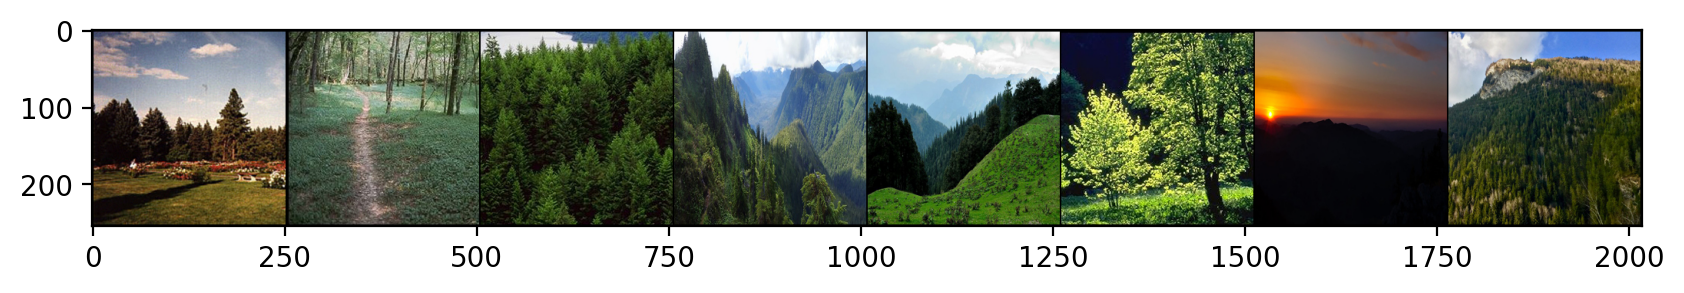

non-fire non-fire non-fire non-fire non-fire non-fire non-fire non-fire


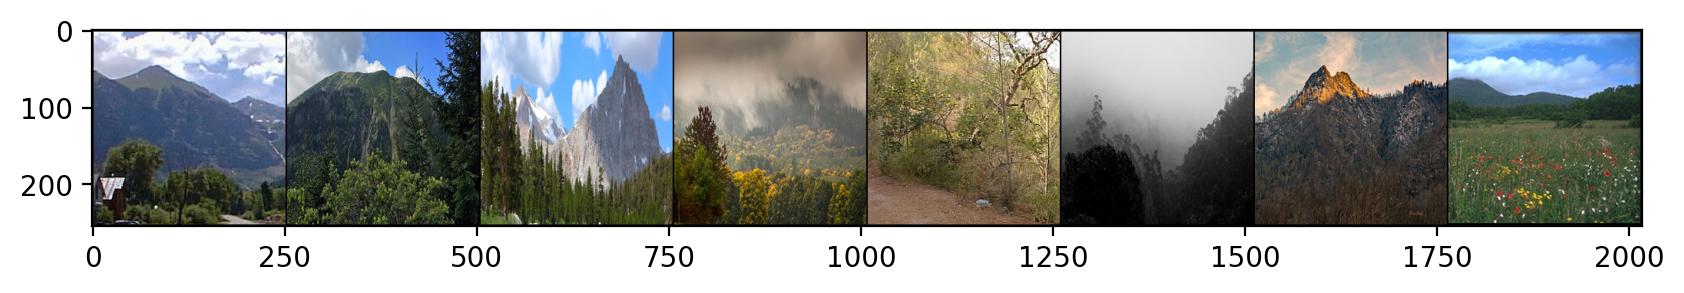

non-fire non-fire non-fire non-fire non-fire non-fire non-fire non-fire


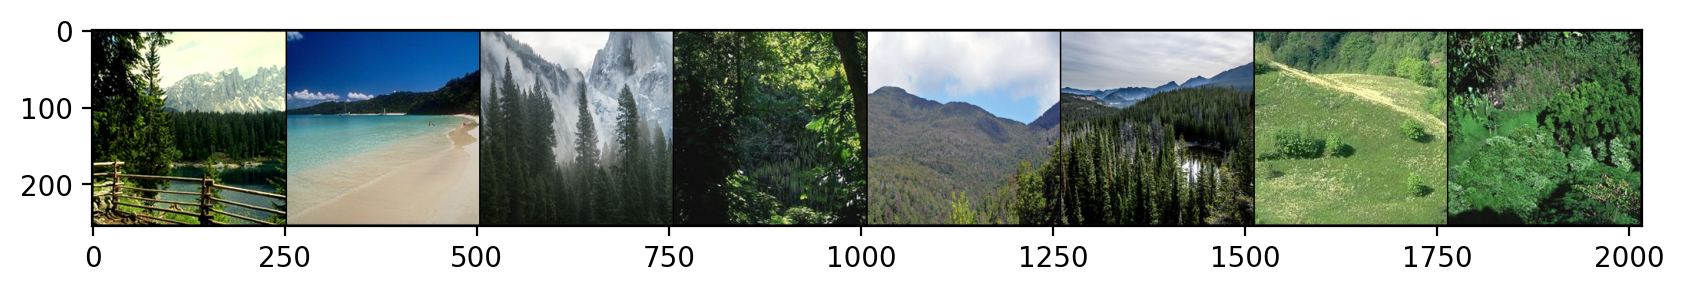

In [15]:
display_image_batch(train_data_loader,3,img_classes)

non-fire non-fire non-fire non-fire non-fire non-fire non-fire non-fire


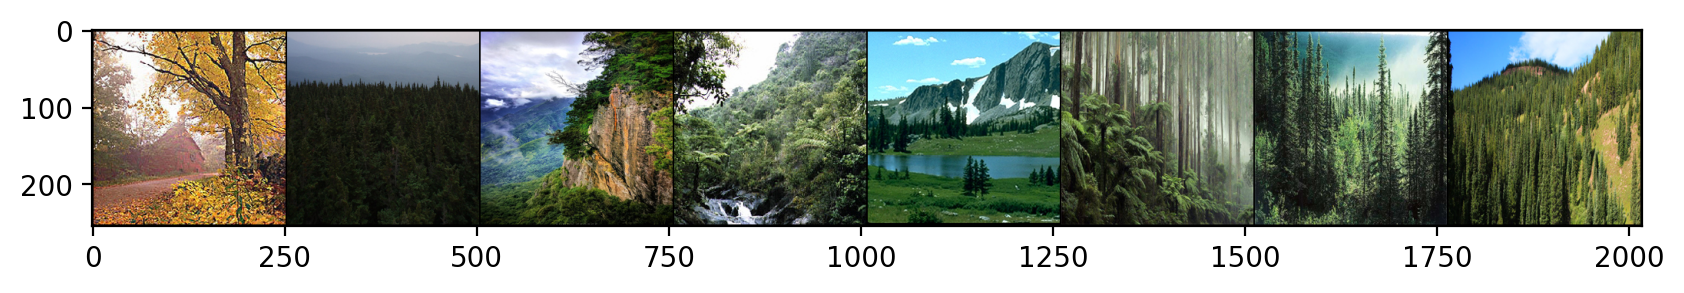

non-fire non-fire non-fire non-fire non-fire non-fire non-fire non-fire


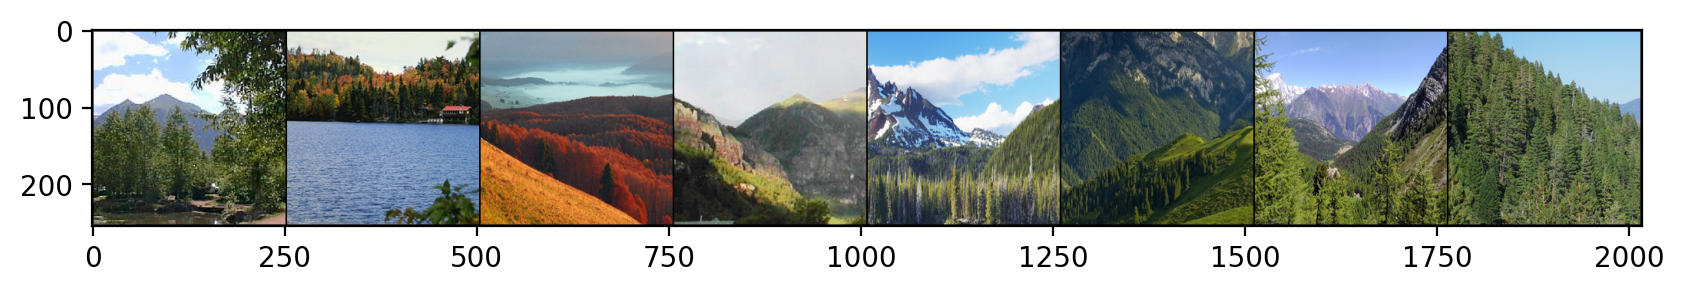

non-fire non-fire non-fire non-fire non-fire non-fire non-fire non-fire


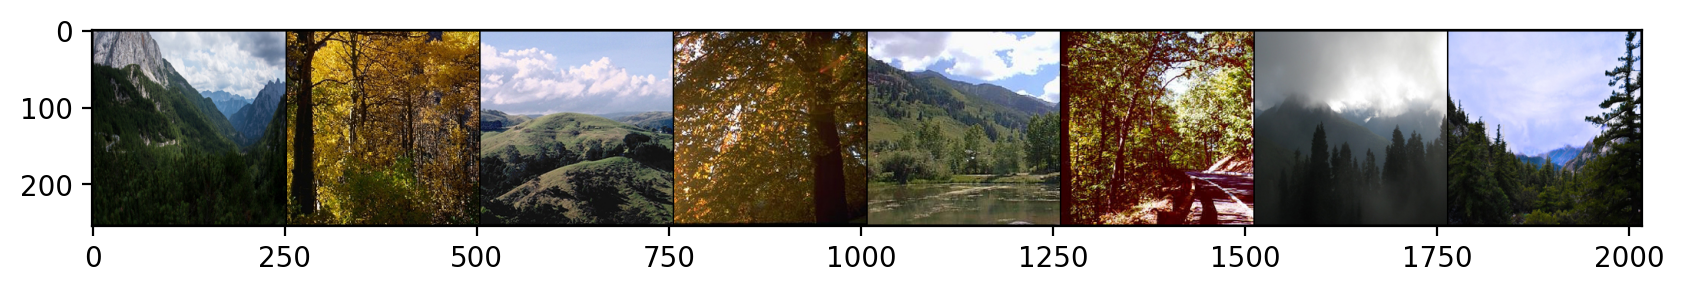

In [16]:
display_image_batch(test_data_loader,3,img_classes)

# Calculate the Statistical Properties of Images

In [17]:
len(train_dataset)

1631

In [18]:
len(test_dataset)

379

In [19]:
from torch.utils.data import ConcatDataset
import torch
import torchvision.transforms as transforms
from torchvision.transforms import v2

def dataset_stat_prop(dataset):

    # Convert dataset into floating point otherwise it can't calculate the mean and std
    dataset.transform = transforms.v2.ToDtype(torch.float)
    
    # stack all images together into a tensor of shape 
    # (N_images, 3, Height, Width)
    # note `sample` is a tuple with (tensor, label)
    
    x = torch.stack([sample[0] for sample in ConcatDataset([dataset])])

    # Get mean and standard deviation. Note we're getting the statistical properties
    # along all images (dim 0), all heights (dim 2) and all widths (dim 3) leaving
    # resulting in a 1 x 3 tensor 
    
    mean = torch.mean(x, dim = (0,2,3)) 
    std = torch.std(x, dim = (0,2,3))

    return mean, std

Statistical properties of train dataset

In [20]:
mean,std = dataset_stat_prop(train_dataset)

In [21]:
mean

tensor([108.1951,  92.0801,  72.5162])

In [22]:
std

tensor([71.4197, 63.3839, 68.5020])

Statistical properties of test dataset

In [23]:
mean,std = dataset_stat_prop(test_dataset)

In [24]:
mean

tensor([109.9357,  91.0615,  69.9621])

In [25]:
std

tensor([71.3041, 63.2729, 67.7713])

# Conclusion

We've successfully created custom datasets and dataloaders. The `src/` folder will be updated with the functions we tested in this notebook, namely:
- `dataset_stat_prop`
- `display_image_batch`

For both functions we have to be careful when we do transformations.